In [1]:
from app.parser import *

In [2]:

def group_by_day(chats_dict_by_hooman, hooman=None):
    if hooman:
        messages = chats_dict_by_hooman[hooman]
    else:
        messages = []
        for hooman in chats_dict_by_hooman:
            messages.extend(chats_dict_by_hooman[hooman])

    grouped = {}
    #print(messages)
    for message in messages:
        date = message["timestamp"]#.strftime('%b %d, %Y')
        # this needs to bo done so that grouping is done
        date = datetime(date.year, date.month, date.day)
        if date not in grouped:
            grouped[date] = []
        
        grouped[date].append(message["content"])

    # join into single string
    for key in grouped:
        grouped[key] = ". ".join(grouped[key])
    
    return grouped    

In [3]:
chats_dict_by_hooman = parse_messenger()

grouped = group_by_day(chats_dict_by_hooman, hooman=None)
#grouped = group_by_day(messages)
grouped;
#messages

In [4]:
from datetime import datetime, timedelta
def get_counts_by_day(messages_grouped_by_day, min_day=None, max_day=None):
    if not min_day:
        min_day = min(list(grouped.keys()))
    if not max_day:
        max_day = max(list(grouped.keys()))
    i = 1
    curr_day = min_day + timedelta(days=1)
    while curr_day < max_day:
        if curr_day not in grouped:
            grouped[curr_day] = ''
        curr_day += timedelta(days=1)        
        i += 1

    counts_by_day = {day: len(grouped[day]) for day in grouped}

    #counts_by_day
    #max_day
    return counts_by_day, min_day, max_day

In [5]:
counts_by_day, min_day, max_day = get_counts_by_day(grouped);

In [6]:
counts_by_day_sorted = sorted([(k, counts_by_day[k]) for k in counts_by_day])
counts_by_day_sorted;

In [7]:
from numpy import mean

def moving_average(data, n):
    new_data = data[:]
    for i in range(len(data)):
        if i == 0:
            new_data[i] = data[i]
        if i < n:
            new_data[i] = mean(data[0:i])
        else:
            new_data[i] = mean(data[i-n:i])
    return new_data


/home/zan/miniconda3/envs/my-uiproject-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/zan/miniconda3/envs/my-uiproject-env/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-8-b95b4a7469ec>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels)


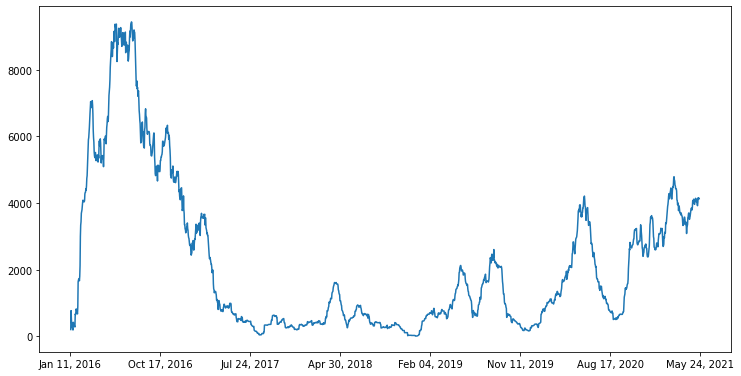

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

days = [x[0] for x in counts_by_day_sorted]
counts = [x[1] for x in counts_by_day_sorted]

counts = moving_average(counts,40)
ax.plot(counts)
#ax.set_yscale('log')
n = len(counts)
from numpy import ceil
from time import strftime
n_ticks = 8
tick_interval = ceil(n/(n_ticks-1))
tick_labels = [(min_day + timedelta(days=i*tick_interval)).strftime('%b %d, %Y') for i in range(n_ticks)]
ticks = [i*tick_interval for i in range(n_ticks)]
ax.set_xticklabels(tick_labels)
ax.set_xticks(ticks);

9 1958


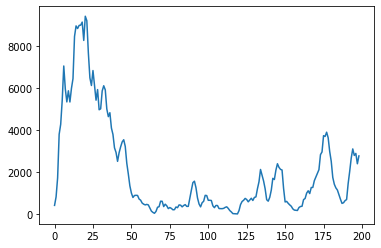

In [9]:
n_points = 200
from numpy import floor
point_interval = int(floor(len(counts)/(n_points)))
print(point_interval, len(counts))
points = [counts[i*point_interval] for i in range(1,n_points)]
points
plt.plot(points)

In [10]:
from datetime import datetime, timedelta
datetime(2021,5,1) + timedelta(days=1)

datetime.datetime(2021, 5, 2, 0, 0)